# Importing Dataset

In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("Advertising.csv")

In [6]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


 total we have 200 rows and 5 columns
 target column is sales

# Checking Null values in the dataframe.

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


Since there are no null values then we can proceed.

# Dataframe Description:

The distribution strategy and the channel design have to be right the first time. 
The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. 
The predict the total sales generated from all the sales channel.  

# Checking the datatypes of the columns.

In [9]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

all data types are float so need for lable encoder

# Visualization of the Data:

In [10]:
import seaborn as sns

In [18]:
df_visualization=df[['TV','radio','newspaper','sales']].copy()

In [19]:
df_visualization.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

197.6    2
237.4    2
177.0    2
76.4     2
222.4    2
        ..
18.8     1
19.4     1
26.8     1
139.2    1
44.5     1
Name: TV, Length: 190, dtype: int64


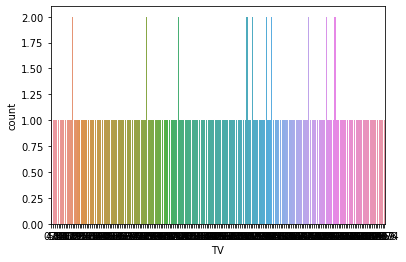

In [21]:
ax = sns.countplot(x="TV", data=df_visualization)
print(df_visualization["TV"].value_counts())

5.7     3
4.1     3
26.7    2
18.1    2
43.0    2
       ..
37.6    1
26.9    1
40.6    1
34.3    1
24.0    1
Name: radio, Length: 167, dtype: int64


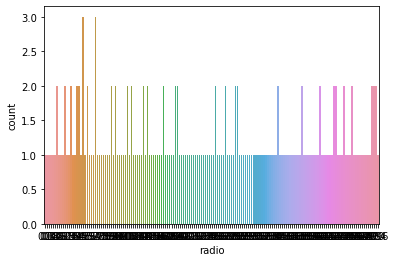

In [22]:
ax = sns.countplot(x="radio", data=df_visualization)
print(df_visualization["radio"].value_counts())

8.7     3
25.6    3
9.3     3
14.2    2
45.1    2
       ..
43.1    1
49.3    1
31.3    1
44.3    1
58.5    1
Name: newspaper, Length: 172, dtype: int64


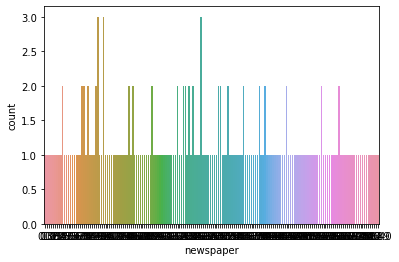

In [23]:
ax = sns.countplot(x="newspaper", data=df_visualization)
print(df_visualization["newspaper"].value_counts())

distplot for terget column

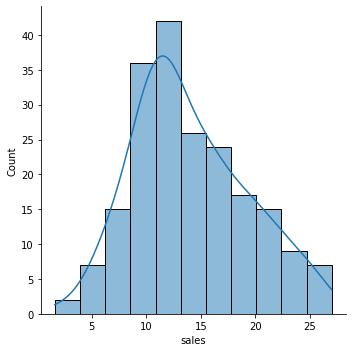

In [25]:
sns.displot(df_visualization['sales'], kde=True)

# Describe the dataset

In [26]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

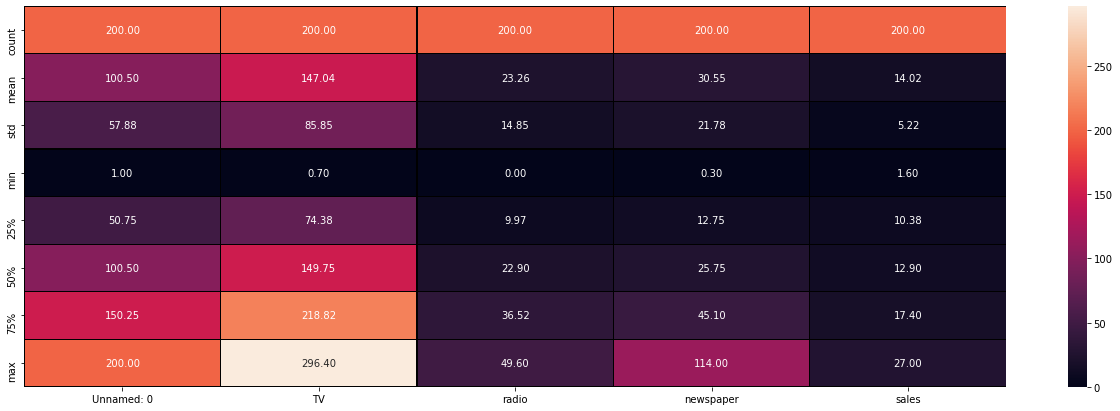

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [28]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

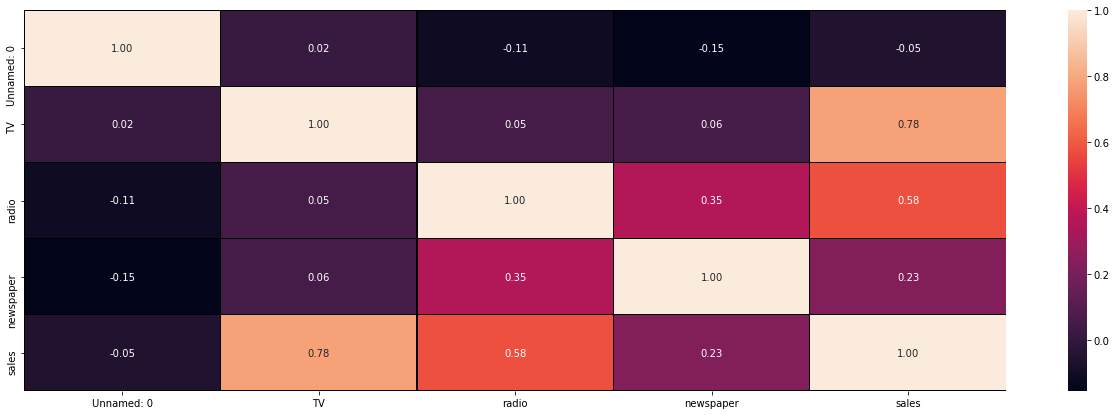

In [29]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [30]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

since skew ness is not present we will process next

# Outliers Check

In [31]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

<AxesSubplot:>

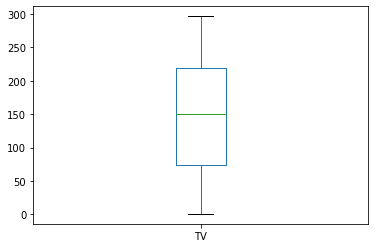

In [32]:
df['TV'].plot.box()

<AxesSubplot:>

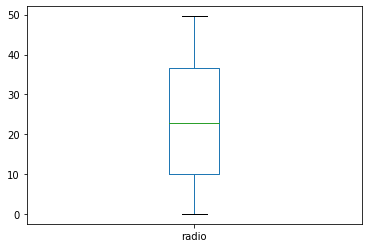

In [33]:
df['radio'].plot.box()

<AxesSubplot:>

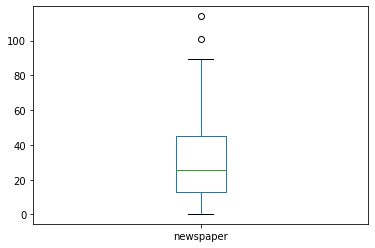

In [34]:
df['newspaper'].plot.box()

<AxesSubplot:>

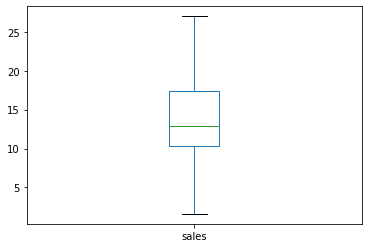

In [35]:
df['sales'].plot.box()

so outlier is present

# Considering the outlier removal

In [37]:
df.shape

(200, 5)

In [38]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [39]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [40]:
df_new_z.shape

(198, 5)

In [42]:
data_loss=((200-198)/200)*100
data_loss

1.0

since it is less than 10 we can process

In [43]:
df=df_new_z

# Separating the columns into features and target:

In [44]:
features=df.drop("sales",axis=1)
target=df["sales"]

# Scaling the data using Min-Max Scaler:

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Find the beset random_State use here (currently we are moving ahead with random_state 12:

In [46]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [47]:
lr.fit(features_train,target_train)

LinearRegression()

In [48]:
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.8989530886907349


# Regularization:

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso

In [50]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [51]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.899358362447154

In [52]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8844838672207616

# Ensemble technique:¶

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [54]:
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [55]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 97.98718730021437
Cross Val Score: 97.21515839683994


# We are getting model accuracy and cross validation  as 97.98% and 97.21 which shows our model is performing extremely well

In [56]:
import pickle
filename = 'bb.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:

In [57]:
loaded_model = pickle.load(open('bb.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result)

0.9798718730021437


In [58]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [59]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,18.859,16.669,10.896,17.585,15.889,6.631,16.269,15.528,12.801,20.007,...,11.415,19.782,21.318,12.562,14.444,11.416,6.808,15.752,22.478,16.107
Orginal,18.859,16.669,10.896,17.585,15.889,6.631,16.269,15.528,12.801,20.007,...,11.415,19.782,21.318,12.562,14.444,11.416,6.808,15.752,22.478,16.107
